In [1]:
import sys
sys.path.append('..')

import numpy as np

from olfactory_navigation.environment import Environment
from olfactory_navigation.agents import FSVI_Agent
from olfactory_navigation.agents.model_based_util.environment_converter import minimal_converter
from olfactory_navigation.test_setups import run_all_starts_test


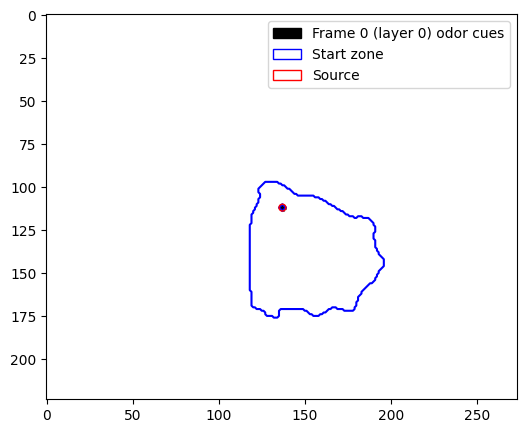

In [2]:
data_path = "C:\\Users\\arnau\\Desktop\\odor_source_15_15.h5"

source_position = (np.array([15,15]) / 0.8).astype(int)
tank_size = (np.array([90,110]) / 0.8).astype(int)

env = Environment(data_file=data_path,
                  data_source_position=[66, 66],
                  source_radius=2,
                  layers=True,
                  shape=(tank_size * 2).tolist(),
                  margins=np.array([(tank_size - source_position), source_position]).T.tolist(),
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_threshold=3e-6)

env.plot()

In [3]:
ag = FSVI_Agent(env, environment_converter=minimal_converter, partitions=[5,5])

[Warning] The whole dataset is being querried, it will be reshaped at this time. To avoid this, avoid querrying environment.data directly.


In [4]:
_ = ag.train(expansions=10, use_gpu=True)

[07/24/2024, 09:54:23] MDP_policy, not provided. Solving MDP with Value Iteration...
[07/24/2024, 09:54:23] Sending Model to GPU...
[07/24/2024, 09:54:24]     > Done in 1.189s


  0%|          | 0/1000 [00:00<?, ?it/s]

Summary of Value Iteration run
  - Model: 50-state, 8-action
  - Converged in 918 iterations and 2.7612 seconds
  - Took on average 0.0030s per iteration


Expansions:   0%|          | 0/10 [00:00<?, ?it/s]

Summary of Point Based Value Iteration run
  - Model: 50 state, 8 action, 3 observations
  - Converged or stopped after 10 expansion steps and 10 backup steps.
  - Resulting value function has 64 alpha vectors.
  - Converged in 4.0100s

  - Expand function took on average 0.3937s and yielded on average 24.80 beliefs per iteration. (0.0381s/it/belief)
  - Backup function took on average 0.0073s and yielded on average 6.30 alpha vectors per iteration. (0.0011s/it/alpha)
  - Pruning function took on average 0.0000s and yielded on average prunings of 0.00 alpha vectors per iteration.


[Warning] 'as_grid' parameter set to False but state count is >3 so it will be plotted as a grid


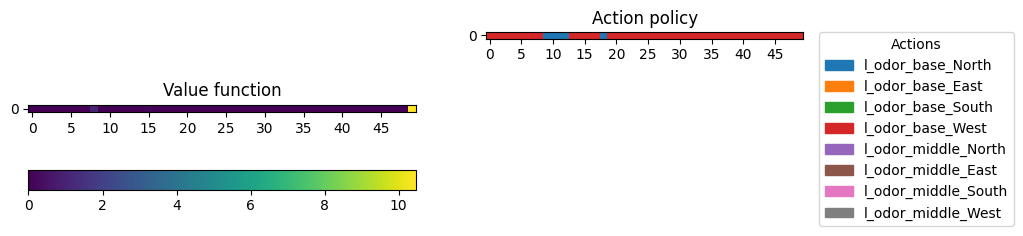

In [5]:
ag.value_function.plot()

In [6]:
hist = run_all_starts_test(ag, use_gpu=True)


  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 11.455s:
Simulations reached goal: 144/4425 (4281 failures (reached horizon: 4281)) (3.25% success)
 - Average step count:                 967.946 +- 174.78 (Successfull only: 15.007 +- 8.53)
 - Extra steps:                        921.939 +- 170.61 (Successful only: 0.000 +- 0.00)
 - Average discounted rewards (ADR):   0.028 +- 0.15 (Successfull only: 0.863 +- 0.07)
 - Tmin/T:                             0.078 +- 0.17 (Successful only: 1.000 +- 0.00)


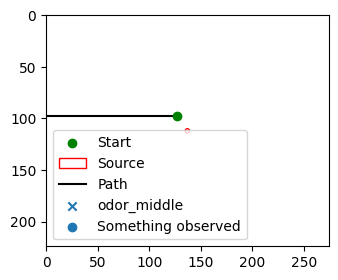

In [7]:
hist.plot()